In [2]:
!pip install matplotlib seaborn


  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl (2.7 MB)
U

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load your dataset (assumed already loaded as df)
df = pd.read_csv("../data/telegram_all_channels_withview.csv")  # Example

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])


In [6]:
# Function to calculate frequency
def compute_posting_frequency(group):
    total_posts = group.shape[0]
    date_range_days = (group['date'].max() - group['date'].min()).days
    total_weeks = max(1, date_range_days / 7)  # Avoid divide by zero
    frequency = total_posts / total_weeks
    return pd.Series({
        'Total Posts': total_posts,
        'Date Range (Days)': date_range_days,
        'Posting Frequency (per week)': round(frequency, 2)
    })

In [7]:
# Group by channel and apply
activity_report = df.groupby('channel').apply(compute_posting_frequency).reset_index()

# Sort by most active channels
activity_report = activity_report.sort_values(by='Posting Frequency (per week)', ascending=False)

# Display
print(activity_report.head(10))  # Top 10 most active channels

                 channel  Total Posts  Date Range (Days)  \
0               AwasMart       5530.0             1037.0   
19              qnashcom       7022.0             1756.0   
10         forfreemarket       5697.0             1754.0   
5           ZemenExpress       4844.0             1886.0   
3               MerttEka       4951.0             2066.0   
14           marakibrand       4751.0             2636.0   
12  helloomarketethiopia       3521.0             2009.0   
8           classybrands       4032.0             2354.0   
17  modernshoppingcenter       2080.0             1221.0   
6            aradabrand2       4319.0             2564.0   

    Posting Frequency (per week)  
0                          37.33  
19                         27.99  
10                         22.74  
5                          17.98  
3                          16.77  
14                         12.62  
12                         12.27  
8                          11.99  
17                      

C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\1723097880.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  activity_report = df.groupby('channel').apply(compute_posting_frequency).reset_index()


C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\4022159343.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  activity_report = df.groupby('channel').apply(compute_posting_frequency).reset_index()
C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\4022159343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_channels, x='Posting Frequency (per week)', y='channel', palette='viridis')


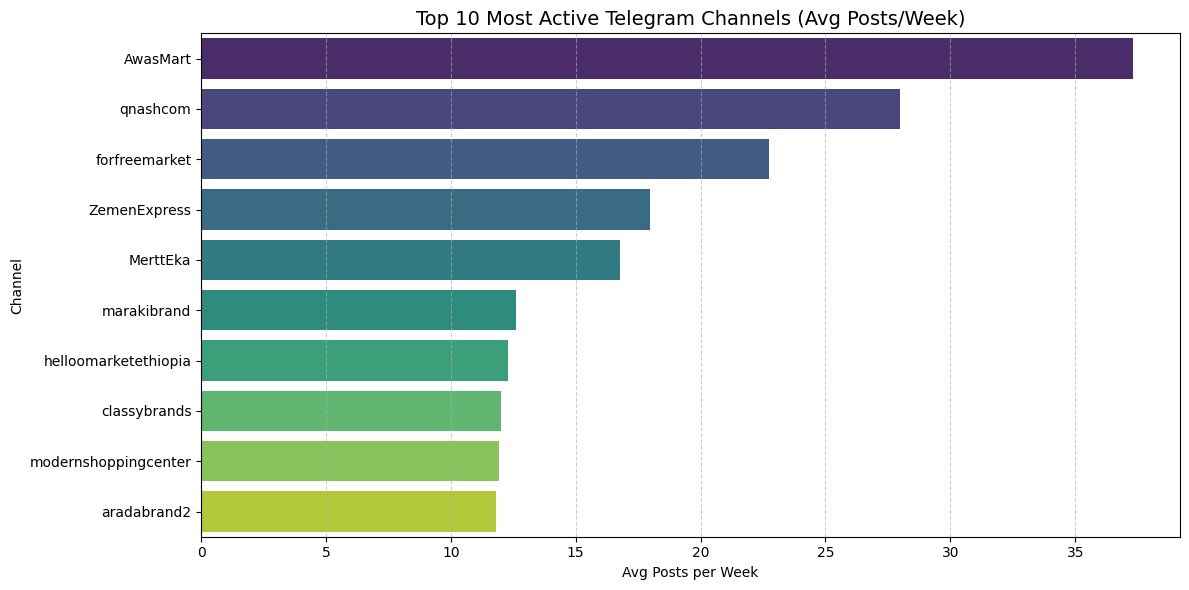

In [8]:
# Group by channel
activity_report = df.groupby('channel').apply(compute_posting_frequency).reset_index()

# Sort by most active channels
top_channels = activity_report.sort_values(by='Posting Frequency (per week)', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_channels, x='Posting Frequency (per week)', y='channel', palette='viridis')
plt.title('Top 10 Most Active Telegram Channels (Avg Posts/Week)', fontsize=14)
plt.xlabel('Avg Posts per Week')
plt.ylabel('Channel')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Top Performing Post per channel (highest views)

In [9]:
import pandas as pd
import re

# Assuming your dataframe is named df and has columns: channel, message_id, date, text, views

# 1. Average Views per Post per channel
avg_views = df.groupby('channel')['views'].mean().reset_index()
avg_views.rename(columns={'views': 'avg_views_per_post'}, inplace=True)

# 2. Find the top performing post per channel (highest views)
idx = df.groupby('channel')['views'].idxmax()
top_posts = df.loc[idx, ['channel', 'message_id', 'date', 'text', 'views']]

# 3. Extract price from post text
def extract_price(text):
    # Find numbers that are likely prices (e.g., 1500, 750, etc.)
    # This regex looks for numbers possibly preceded or followed by currency symbol or words
    matches = re.findall(r'\b\d{2,6}\b', text)  # numbers between 2 and 6 digits
    if matches:
        # Return the first match as price (you can improve this logic)
        return int(matches[0])
    else:
        return None

top_posts['price'] = top_posts['text'].apply(extract_price)

# Merge average views info
report = pd.merge(top_posts, avg_views, on='channel')

# Display report sorted by average views descending
report = report.sort_values(by='avg_views_per_post', ascending=False)

print(report[['channel', 'message_id', 'date', 'views', 'avg_views_per_post', 'price', 'text']])


                   channel  message_id                      date   views  \
2                  Leyueqa        4486 2024-01-26 07:01:53+00:00  201643   
9   ethio_brand_collection        4100 2020-09-09 07:54:03+00:00  125563   
3                 MerttEka        5958 2024-06-23 05:33:57+00:00  216470   
19                qnashcom         131 2021-01-09 09:50:10+00:00  236769   
17    modernshoppingcenter        5318 2025-01-04 16:57:42+00:00  200841   
1              Fashiontera        1237 2019-10-17 08:01:15+00:00   74718   
14             marakibrand        5833 2021-01-10 13:38:28+00:00   77876   
20                sinayelj       13087 2023-12-02 13:10:30+00:00  452589   
7              belaclassic        1196 2024-11-26 04:59:16+00:00   24307   
5             ZemenExpress        1914 2022-09-15 12:39:28+00:00   29997   
15              marakisat2        3609 2019-08-29 01:56:15+00:00   90122   
10           forfreemarket        5597 2022-12-31 16:57:29+00:00   30291   
4           

C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\3399902471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_views.index, y=avg_views.values, palette='viridis')
C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\3399902471.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\week-4\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


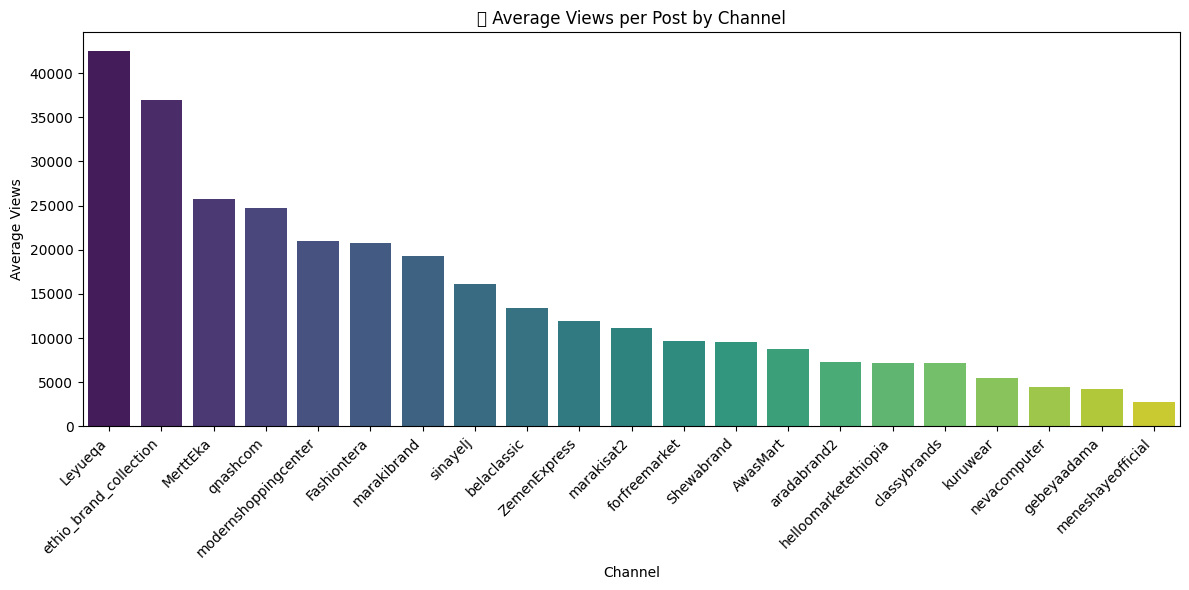

C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\3399902471.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_posts['channel'], y=top_posts['price'].astype(float), palette='coolwarm')
C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\3399902471.py:45: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\week-4\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


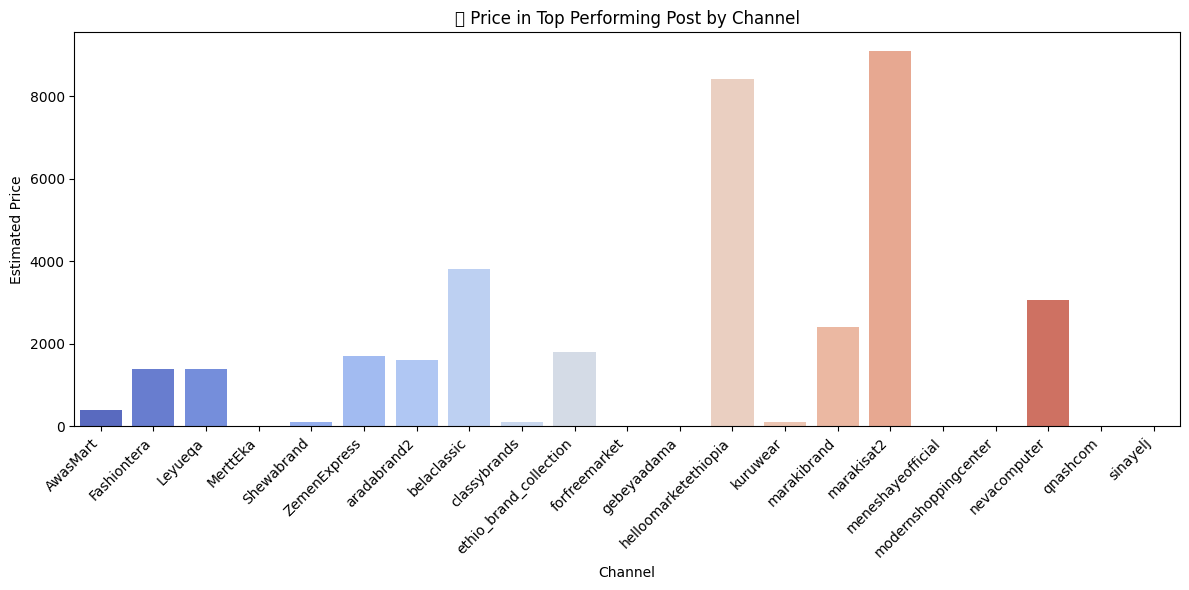

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. Load your data (if not already loaded)
# df = pd.read_csv('/content/your_file.csv')  # Replace with your actual path

# 2. Clean views column (if needed)
df['views'] = pd.to_numeric(df['views'], errors='coerce')

# 3. Drop missing views
df = df.dropna(subset=['views'])

# ========== 1. Average Views per Post by Channel ==========
avg_views = df.groupby('channel')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_views.index, y=avg_views.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('📊 Average Views per Post by Channel')
plt.ylabel('Average Views')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

# ========== 2. Top Performing Post with Extracted Price ==========
# Step 1: Find top post per channel
top_posts = df.loc[df.groupby('channel')['views'].idxmax()]

# Step 2: Extract price (any number that looks like a price)
def extract_price(text):
    matches = re.findall(r'\b\d{3,5}\b', str(text))  # Numbers with 3-5 digits
    return matches[0] if matches else None

top_posts['price'] = top_posts['text'].apply(extract_price)

# Step 3: Plot prices of top-performing posts
plt.figure(figsize=(12, 6))
sns.barplot(x=top_posts['channel'], y=top_posts['price'].astype(float), palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('💰 Price in Top Performing Post by Channel')
plt.ylabel('Estimated Price')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()


C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\2076464432.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_channel.index, y=avg_price_per_channel.values, palette='Spectral')
C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\2076464432.py:36: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\week-4\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


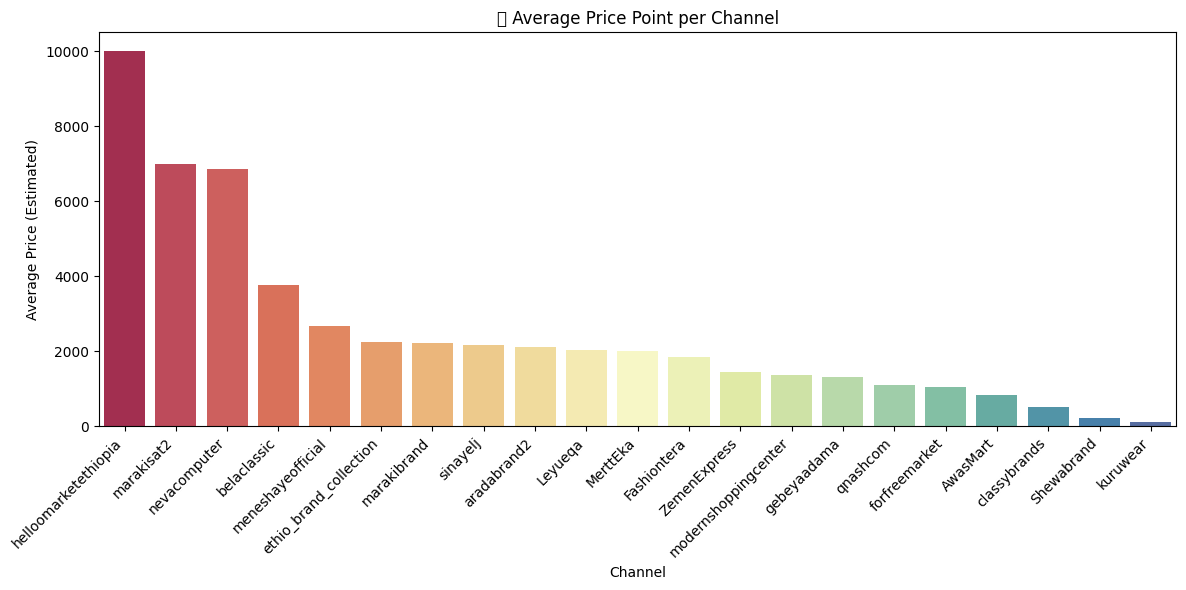

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Example: df = pd.read_csv('/content/your_data.csv')
# Make sure views column is numeric
df['views'] = pd.to_numeric(df['views'], errors='coerce')

# Function to extract price from text using regex (fallback if NER model not used)
def extract_price(text):
    if not isinstance(text, str):
        return None
    # Look for numbers (3 to 6 digits) followed by optional currency (ብር, ETB)
    match = re.findall(r'\b\d{3,6}\b', text)
    if match:
        return float(match[0])  # pick the first match
    return None

# Apply extraction
df['price'] = df['text'].apply(extract_price)

# Drop rows with no price
df_with_price = df.dropna(subset=['price'])

# Compute average price per channel
avg_price_per_channel = df_with_price.groupby('channel')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_channel.index, y=avg_price_per_channel.values, palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.title('💸 Average Price Point per Channel')
plt.ylabel('Average Price (Estimated)')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()





C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\341870248.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['date'].dt.to_period('W')
C:\Users\Bob\AppData\Local\Temp\ipykernel_19440\341870248.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores, y='channel', x='Lending_Score', palette='viridis')


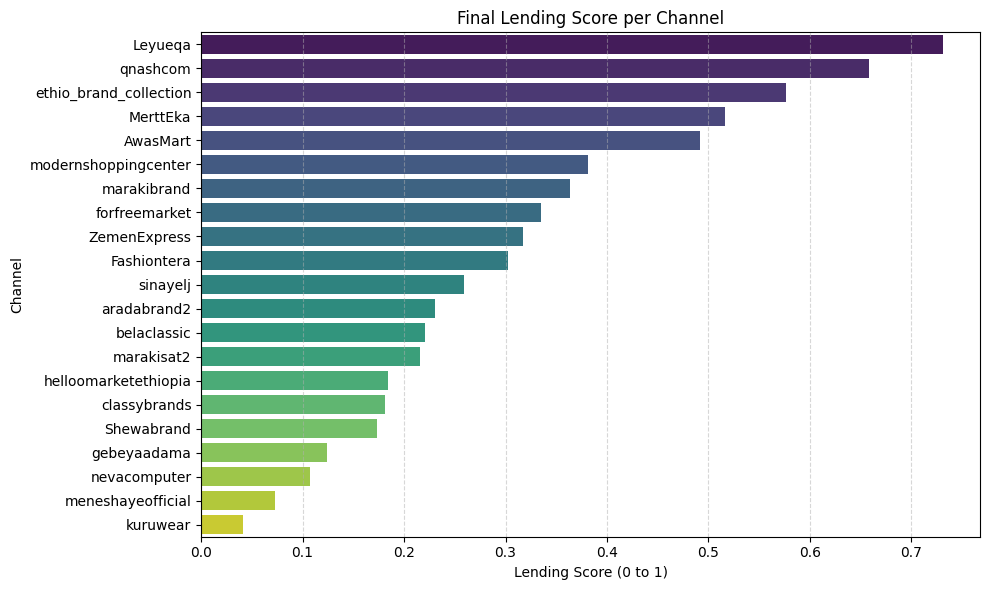

🔝 Top 5 Channels to Consider for Lending:
Leyueqa: Score = 0.73, Avg Views = 42504, Posts/Week = 14.3
qnashcom: Score = 0.66, Avg Views = 24772, Posts/Week = 30.7
ethio_brand_collection: Score = 0.58, Avg Views = 36954, Posts/Week = 8.3
MerttEka: Score = 0.52, Avg Views = 25719, Posts/Week = 17.5
AwasMart: Score = 0.49, Avg Views = 8814, Posts/Week = 36.9


In [15]:
# Posting frequency per week
df['week'] = df['date'].dt.to_period('W')
posts_per_week = df.groupby(['channel', 'week']).size().reset_index(name='post_count')
weekly_avg = posts_per_week.groupby('channel')['post_count'].mean().reset_index(name='avg_posts_per_week')

# Average views per post
views_avg = df.groupby('channel')['views'].mean().reset_index(name='avg_views')

# Merge both metrics
scores = pd.merge(weekly_avg, views_avg, on='channel')

# Normalize both columns (min-max scaling)
scores['norm_views'] = (scores['avg_views'] - scores['avg_views'].min()) / (scores['avg_views'].max() - scores['avg_views'].min())
scores['norm_freq'] = (scores['avg_posts_per_week'] - scores['avg_posts_per_week'].min()) / (scores['avg_posts_per_week'].max() - scores['avg_posts_per_week'].min())

# Lending score formula (adjust weights if needed)
scores['Lending_Score'] = (scores['norm_views'] * 0.6) + (scores['norm_freq'] * 0.4)

# Sort descending
scores = scores.sort_values('Lending_Score', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=scores, y='channel', x='Lending_Score', palette='viridis')
plt.title("Final Lending Score per Channel")
plt.xlabel("Lending Score (0 to 1)")
plt.ylabel("Channel")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print top 5 recommendations
print("🔝 Top 5 Channels to Consider for Lending:")
for idx, row in scores.head(5).iterrows():
    print(f"{row['channel']}: Score = {row['Lending_Score']:.2f}, Avg Views = {int(row['avg_views'])}, Posts/Week = {row['avg_posts_per_week']:.1f}")